In [1]:
import numpy as np
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *

# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()

In [2]:
pip install hiveplot

  Using cached hiveplot-2017.10.17.21.7-py2.py3-none-any.whl (6.4 kB)
  Using cached pycodestyle-2.3.1-py2.py3-none-any.whl (45 kB)
  Attempting uninstall: pycodestyle
    Found existing installation: pycodestyle 2.9.1
    Uninstalling pycodestyle-2.9.1:
      Successfully uninstalled pycodestyle-2.9.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
autopep8 1.7.0 requires pycodestyle>=2.9.1, but you have pycodestyle 2.3.1 which is incompatible.
Note: you may need to restart the kernel to use updated packages.


In [3]:
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
import warnings
from zlib import crc32
warnings.filterwarnings("ignore")
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from zlib import crc32
from hiveplot import HivePlot

In [ ]:
#get the amount of nodes to be ploted on hive plot
num_nodes = int(input("Enter amount of IP addresses: "))
#create new lists to store nodes
lst_nodes = []
lst_time_source = []
lst_time_country = []
sort_source = []
sort_country = []
sort_time = []
for i in range (0, num_nodes):
    #get all data
    getnode = input("Enter hashed IP address: ")
    getcountry = input("Enter country name: ")
    gettime = float(input("Enter timestamp: "))
    ask_weight = float(input("Enter weight: "))
    #functions that will convert str to float
    def bytes_to_float(b):
        return float(crc32(b) & 0xffffffff) / 2**32
    def str_to_float(s, encoding="utf-8"):
        return bytes_to_float(s.encode(encoding))
    
    all_nodes = str_to_float(getnode),str_to_float(getcountry), ask_weight
    time_source = gettime, str_to_float(getnode), ask_weight
    time_country = gettime, str_to_float(getcountry), ask_weight
    source_IP = str_to_float(getnode)
    count_ry = str_to_float(getcountry)
    ti_me = gettime
    lst_nodes.append(all_nodes)
    lst_time_source.append(time_source)
    lst_time_country.append(time_country)
    sort_source.append(source_IP)
    sort_country.append(count_ry)
    sort_time.append(ti_me)

Enter amount of IP addresses:  11
Enter hashed IP address:  222.165.219.225:8080
Enter country name:  Indonesia
Enter timestamp:  37.85004411
Enter weight:  5


In [5]:
# sorts lists
source_ip_nodes = sorted(sort_source, key = float)
country_ip_nodes = sorted(sort_country, key = float)
time_ip_nodes = sorted(sort_time, key = float)

In [6]:
#checks for duplicates in all lists
sort_source_again = []
for i in source_ip_nodes:
    if i not in sort_source_again:
        sort_source_again.append(i)
    
sort_country_again = []
for i in country_ip_nodes:
    if i not in sort_country_again:
        sort_country_again.append(i)
        
sort_time_again = []
for i in time_ip_nodes:
    if i not in sort_time_again:
        sort_time_again.append(i)

In [7]:
#using pandas - store data
data = pd.DataFrame(np.c_[lst_nodes], columns=["source IP","country",
"weight"])

data

,source IP,country,weight
0,0.389821,0.189792,5.0
1,0.389821,0.189792,5.0
2,0.389821,0.189792,5.0
3,0.389821,0.189792,5.0
4,0.389821,0.189792,5.0
5,0.389821,0.189792,5.0
6,0.324833,0.867565,1.0
7,0.246933,0.000933,1.0


In [9]:
other_data = pd.DataFrame(np.c_[lst_time_source], columns=["time","source IP", "weight"])
                                                           
other_data

,time,source IP,weight
0,92.641528,0.389821,5.0
1,93.610719,0.389821,5.0
2,94.100200,0.389821,5.0
3,94.135310,0.389821,5.0
4,91.574936,0.389821,5.0
5,94.323903,0.389821,5.0
6,94.009833,0.324833,1.0
7,95.574843,0.246933,1.0


In [10]:
this_data = pd.DataFrame(np.c_[lst_time_country], columns=["time","country", "weight"])
this_data

,time,country,weight
0,92.641528,0.189792,5.0
1,93.610719,0.189792,5.0
2,94.100200,0.189792,5.0
3,94.135310,0.189792,5.0
4,91.574936,0.189792,5.0
5,94.323903,0.189792,5.0
6,94.009833,0.867565,1.0
7,95.574843,0.000933,1.0


In [11]:
#creating edges
directed_G = nx.DiGraph()
for sIP, cty, wgt in data.values:
    directed_G.add_edge(sIP, cty, weight=wgt)

In [12]:
directed_G_other = nx.DiGraph()
for sIP, ti, wgt in other_data.values:
    directed_G_other.add_edge(ti, sIP, weight=wgt)

In [13]:
directed_G_this = nx.DiGraph()
for cty, ti, wgt in this_data.values:
    directed_G_this.add_edge(ti,cty, weight=wgt)

In [14]:
#combine all nx.DiGraph()s
t = nx.compose(directed_G,directed_G_other)
b = nx.compose(t,directed_G_this)

In [15]:
#adding nodes and edges to hive plot
nodes = dict()
nodes['Time'] = sort_time_again
nodes['Source IP'] = sort_source_again
nodes['Country'] = sort_country_again
edges = dict()
edges['all'] = directed_G.edges(data=True)
edges['time-source'] = directed_G_other.edges(data=True)
edges['time-country'] = directed_G_this.edges(data=True)
nodes_cmap = dict()
nodes_cmap['Source IP'] = 'red'
nodes_cmap['Country'] = 'blue'
nodes_cmap['Time'] = 'black'
edges_cmap = dict()
edges_cmap['all'] = 'green'
edges_cmap['time-source'] = 'green'
edges_cmap['time-country'] = 'green'

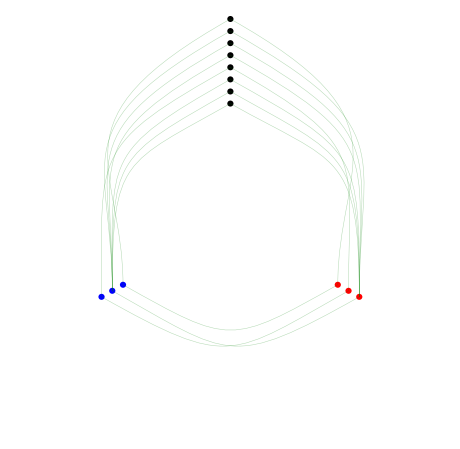

In [17]:
#Hive plot
h = HivePlot(nodes=nodes, edges=edges, node_colormap=nodes_cmap, edge_colormap=edges_cmap)
h.draw()